In [43]:
%matplotlib inline
import matplotlib.pyplot as plt       # Necessary imports
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
# Loading the measured data of background, Silver and Indium
unterg = np.loadtxt('data/UntergrundAGDKMZ.dat', usecols=[1])
n1 =np.loadtxt("data/Messung1.dat", usecols=[1])
n2 =np.loadtxt("data/Messung2.dat", usecols=[1])
n3 =np.loadtxt("data/Messung3.dat", usecols=[1])
n4 =np.loadtxt("data/Messung4.dat", usecols=[1])
NI =np.loadtxt("data/MessungIndium.dat", usecols=[1])

# Half-life of Silver

Average: 19.3333333333 Error: 1.08388874651


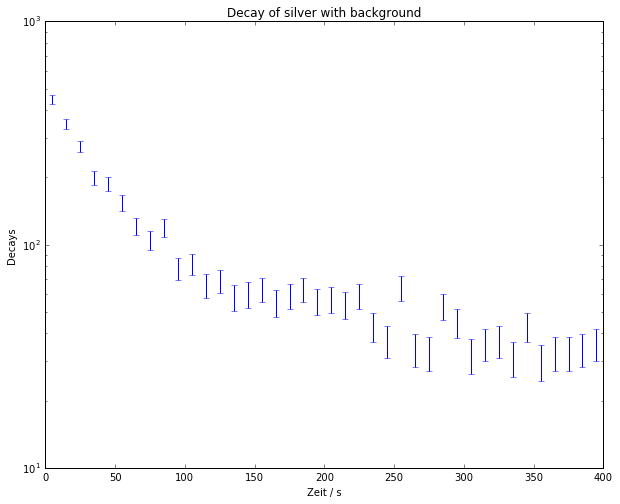

In [44]:
# Calculating the average background and summed measurements + their errors
mittelw_unterg=np.mean(4*unterg)  #*4 since the individual results are summed over
fehler_unterg=np.std(4*unterg)/np.sqrt(len(unterg))
print("Average:", mittelw_unterg, "Error:",fehler_unterg)
N=n1+n2+n3+n4
Fehler_N=np.sqrt(N)   # Since Poisson distribution
Fehler_NI=np.sqrt(NI)
# Draw silver decay
plt.figure(1, figsize=(10,8))
t=np.arange(5,405,10)
plt.errorbar(t,N, Fehler_N, linestyle='None')
plt.xlabel('Zeit / s')
plt.ylabel('Decays')
plt.title('Decay of silver with background')
plt.yscale('log')

A1= 418.786561029 , Standard deviation= 23.4128552927
l1= 0.0336517990339 , Standard deviation= 0.00328975316867
A2= 79.1705216874 , Standard deviation= 14.4970617942
l2= 0.00462677814711 , Standard deviation= 0.000748399283004
chi2= 37.2322061509
chi2_red= 1.03422794864
Probability= 41.0 %


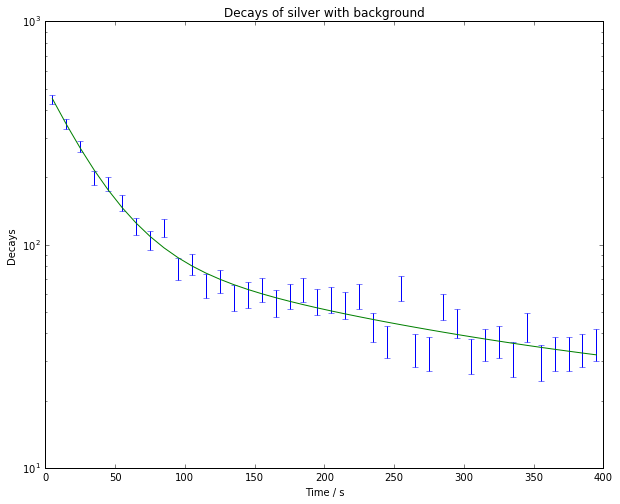

In [45]:
y_0=mittelw_unterg   # Define the fit funtion for silver
def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y_0
# Fit the data with this fit curve
popt, pcov = curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001], sigma=Fehler_N, maxfev=5000)
# Plot fitted curve
plt.figure(2, figsize=(10,8))
plt.errorbar(t,N, Fehler_N, linestyle='None')
plt.xlabel('Time / s')
plt.ylabel('Decays')
plt.title('Decays of silver with background')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt))
plt.savefig('figures/Silver.pdf',format='pdf')

print("A1=",popt[0], ", Standard deviation=", np.sqrt(pcov[0][0]))
print("l1=",popt[1], ", Standard deviation=", np.sqrt(pcov[1][1]))
print("A2=",popt[2], ", Standard deviation=", np.sqrt(pcov[2][2]))
print("l2=",popt[3], ", Standard deviation=", np.sqrt(pcov[3][3]))

chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-4 #dof: degrees of freedom
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Probability=", prob,"%")

In [46]:
y_0=mittelw_unterg-fehler_unterg
# Fit the data with this fit curve
poptm, pcovm = curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001], sigma=Fehler_N, maxfev=5000)
# Plot fitted curve
print("l1-=",poptm[1], ", Standard deviation=", np.sqrt(pcovm[1][1]))
print("l2-=",poptm[3], ", Standard deviation=", np.sqrt(pcovm[3][3]))

y_0=mittelw_unterg+fehler_unterg
# Fit the data with this fit curve
poptp, pcovp = curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001], sigma=Fehler_N, maxfev=5000)
# Plot fitted curve
print("l1+=",poptp[1], ", Standard deviation=", np.sqrt(pcovp[1][1]))
print("l2+=",poptp[3], ", Standard deviation=", np.sqrt(pcovp[3][3]))

dl1=np.sqrt(pcov[1][1]+((abs(popt[1]-poptp[1])+abs(popt[1]-poptm[1]))/2)**2)
dl2=np.sqrt(pcov[3][3]+((abs(popt[3]-poptp[3])+abs(popt[3]-poptm[3]))/2)**2)
T1=ln(2)/popt[1]
T2=ln(2)/popt[3]
dT1=T1*dl1/popt[1]
dT2=T2*dl2/popt[1]
print("Lifetime of Ag:")

l1-= 0.0335097118379 , Standard deviation= 0.00321942056019
l2-= 0.00443145099982 , Standard deviation= 0.000714958835988
l1+= 0.0338070097874 , Standard deviation= 0.00336892625208
l2+= 0.00483886539835 , Standard deviation= 0.000785297054732


NameError: name 'ln' is not defined

# Half-life of Indium

A= 695.960965884 , Standard deviation= 23.4128552927
l= 0.000200371583419 , Standard deviation= 0.00328975316867
chi2= 30.3016484278
chi2_red= 1.77296219766
Probability= 74.0 %


C:\WinPython-64bit-3.4.4.1\python-3.4.4.amd64\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: overflow encountered in exp


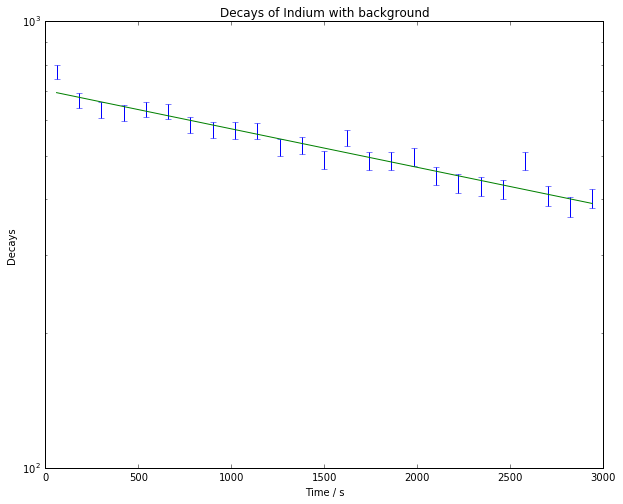

In [49]:
mean_bg_I=np.mean(unterg)
error_bg_I=np.std(unterg)/np.sqrt(len(unterg))

tI=np.arange(60,3060,120)
y_0=mean_bg_I   # Define the fit funtion for silver
def fit_func_I(x, A,l):
    return A*np.exp(-x*l) + y_0
# Fit the data with this fit curve
poptI, pcovI = curve_fit(fit_func_I,tI,NI, p0=[500,0.02], sigma=Fehler_NI, maxfev=5000)
# Plot fitted curve
plt.figure(2, figsize=(10,8))
plt.errorbar(tI,NI, Fehler_NI, linestyle='None')
plt.xlabel('Time / s')
plt.ylabel('Decays')
plt.title('Decays of Indium with background')
plt.yscale('log')
plt.plot(tI,fit_func_I(tI,*poptI))
plt.savefig('figures/Indium.pdf',format='pdf')

print("A=",poptI[0], ", Standard deviation=", np.sqrt(pcov[0][0]))
print("l=",poptI[1], ", Standard deviation=", np.sqrt(pcov[1][1]))

chi2_I=np.sum((fit_func_I(tI,*poptI)-NI)**2/Fehler_NI**2)
dofI=len(NI)-4 #dof: degrees of freedom
chi2_redI=chi2_/dofI
print("chi2=", chi2_I)
print("chi2_red=",chi2_redI)
prob=round(1-chi2.cdf(chi2_I,dof),2)*100
print("Probability=", prob,"%")

In [50]:
y_0=mean_bg_I-error_bg_I
# Fit the data with this fit curve
poptmI, pcovmI = curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001], sigma=Fehler_N, maxfev=5000)
# Plot fitted curve
print("l1-=",poptmI[1], ", Standard deviation=", np.sqrt(pcovmI[1][1]))
print("l2-=",poptmI[3], ", Standard deviation=", np.sqrt(pcovmI[3][3]))

y_0=mean_bg_I+error_bg_I
# Fit the data with this fit curve
poptpI, pcovpI = curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001], sigma=Fehler_N, maxfev=5000)
# Plot fitted curve
print("l1+=",poptpI[1], ", Standard deviation=", np.sqrt(pcovpI[1][1]))
print("l2+=",poptpI[3], ", Standard deviation=", np.sqrt(pcovpI[3][3]))

dl1I=np.sqrt(pcov[1][1]+((abs(poptI[1]-poptpI[1])+abs(poptI[1]-poptmI[1]))/2)**2)
dl2I=np.sqrt(pcov[3][3]+((abs(poptI[3]-poptpI[3])+abs(poptI[3]-poptmI[3]))/2)**2)

l1-= 0.0324014259093 , Standard deviation= 0.00273422649754
l2-= 0.0028674409595 , Standard deviation= 0.000460853388626
l1+= 0.0324299287778 , Standard deviation= 0.00274541986604
l2+= 0.00290860961308 , Standard deviation= 0.000467334103351


IndexError: index 3 is out of bounds for axis 0 with size 2